In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

Загрузка тестовых данных

In [2]:
df = pd.read_csv("data_traffic.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(148517, 43)

In [4]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


'land','urgent','numfailedlogins','numoutboundcmds' имеют в основном нулевые значения, то можеи удалить эти столбцы. Они не влияют на классификацию.

In [5]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [6]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

Количество столбцов с категориальными значениями

In [7]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
148512,tcp,smtp,SF,normal
148513,tcp,http,SF,normal
148514,tcp,http,SF,back
148515,udp,domain_u,SF,normal


Рассматриваем бинарную классификацию, то сделаем 2 категории: normal и attack. Закодируем эти стоблцы

In [8]:
df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [9]:
df['attack'].loc[df['attack']!='normal']='attack'

In [10]:
df['protocoltype'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [11]:
df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [12]:
df['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [13]:
encor=LabelEncoder()

In [14]:
df['protocoltype']=encor.fit_transform(df['protocoltype'])
df['service']=encor.fit_transform(df['service'])
df['flag']=encor.fit_transform(df['flag'])

Закодируем нормальный трафик normal - 0, аномалии - 1

In [15]:
df['attack']=np.where(df['attack'] =='normal', '0', df['attack'])
df['attack']=np.where(df['attack'] =='attack', '1', df['attack'])

In [16]:
df['attack'].unique()

array(['0', '1'], dtype=object)

In [17]:
df['attack'].value_counts()

0    77054
1    71463
Name: attack, dtype: int64

По результату видим, что выборка достаточно сбалансирована. Пригодна для дальнейшего анализа.

Построим матрицу корреляции 

<AxesSubplot:>

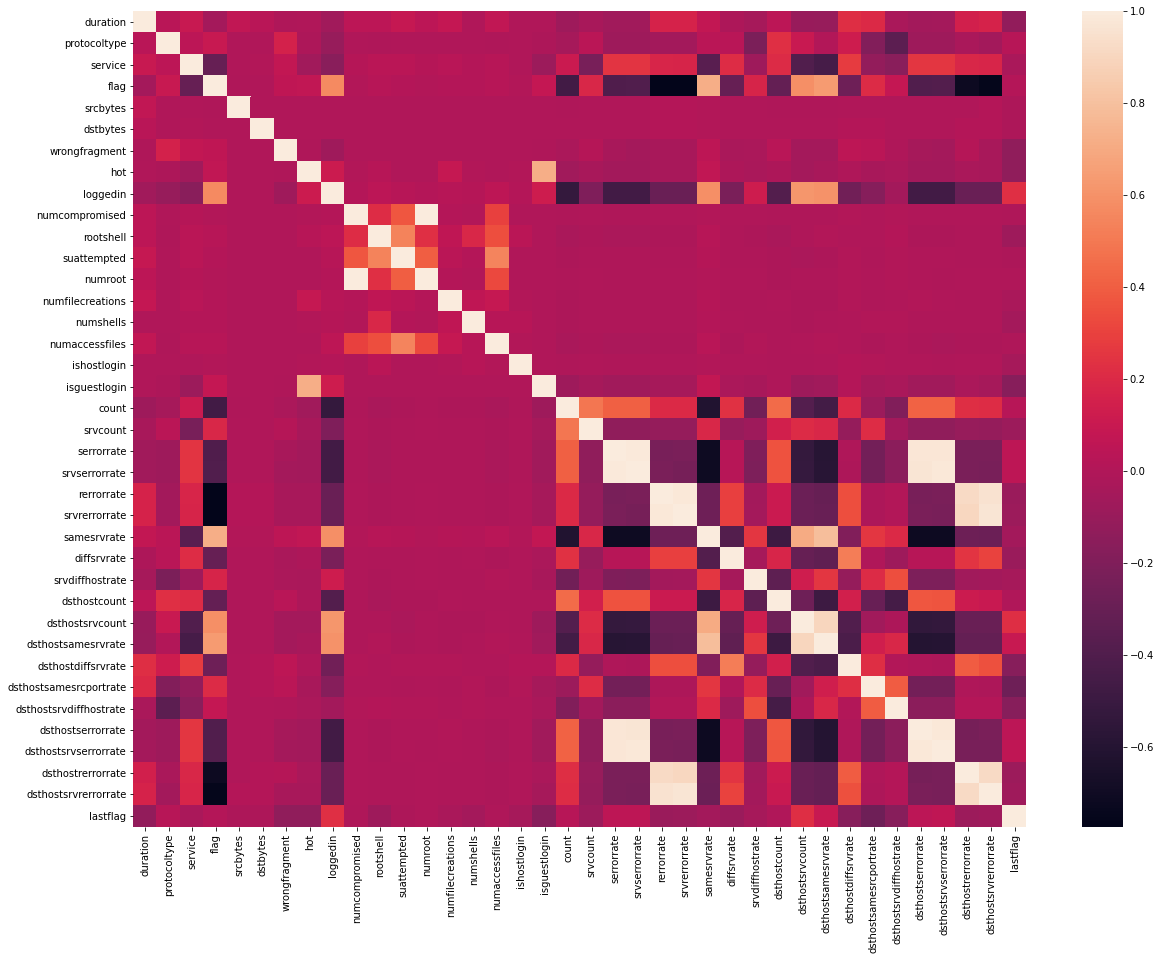

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

Выделяем входные и выходные параметры

In [19]:
X=df.drop(['attack'],axis=1)
y=df['attack']

In [20]:
X.shape

(148517, 38)

<AxesSubplot:xlabel='attack', ylabel='count'>

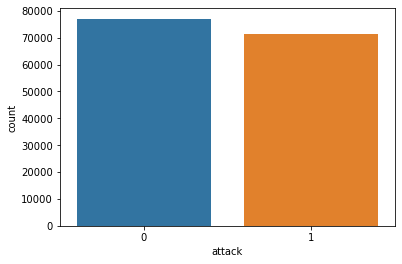

In [21]:
sns.countplot(df['attack'])

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

In [66]:
#функция для вычисления метрик: accurancy, precision, recall, f-mera
def class_report(model, X_test, y_test, y_pred):
    result = []
    start_time = datetime.now()
    result.append(model.score(X_test,y_test))
    time = datetime.now() - start_time
    result.append(precision_score(y_test, y_pred, average='binary', pos_label='1'))
    result.append(recall_score(y_test, y_pred, average='binary', pos_label='1'))
    result.append(f1_score(y_test, y_pred, average='binary', pos_label='1'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    result.append(tn)
    result.append(fp)
    result.append(fn)
    result.append(tp)
    result.append(time)
    return result

Выделяем 70% под обучающей, 30% - тестовой

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y, test_size = 0.3 , random_state = 0)
y_test.value_counts()

0    23140
1    21416
Name: attack, dtype: int64

In [56]:
#для сохранения метрик моделей
metric_results_model = {}
#время выполнения прогнозирования
time_execution = {}

Логистическая регрессия

In [59]:
lr = LogisticRegression(solver='liblinear', max_iter=100)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

Матрица ошибок

In [60]:
print("confusion_matrix LogisticRegression")
confusion_matrix(y_test,y_pred_lr)

confusion_matrix LogisticRegression


array([[22247,   893],
       [  712, 20704]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     23140
           1       0.96      0.97      0.96     21416

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556



In [67]:
metric_results_model['LogisticRegression'] = class_report(lr, X_test, y_test, y_pred_lr)

Рассмотрим метод опорных векторов

In [68]:
svc = svm.LinearSVC(random_state=0, loss='squared_hinge', penalty='l1', dual=False,class_weight='balanced')
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

In [69]:
print("confusion_matrix SVM")
confusion_matrix(y_test,y_pred_svm)

confusion_matrix SVM


array([[22185,   955],
       [  661, 20755]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     23140
           1       0.96      0.97      0.96     21416

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556



In [71]:
metric_results_model['SVM'] = class_report(svc, X_test, y_test, y_pred_svm)

Рассмотрим случайный лес

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [73]:
print("confusion_matrix RandomForest")
confusion_matrix(y_test,y_pred_rf)

confusion_matrix RandomForest


array([[23122,    18],
       [   11, 21405]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23140
           1       1.00      1.00      1.00     21416

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [75]:
metric_results_model['RandomForest'] = class_report(rf, X_test, y_test, y_pred_rf)

AdaBoost

In [76]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

In [77]:
print("confusion_matrix AdaBoost")
confusion_matrix(y_test,y_pred_ab)

confusion_matrix AdaBoost


array([[22734,   406],
       [  591, 20825]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred_ab))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23140
           1       0.98      0.97      0.98     21416

    accuracy                           0.98     44556
   macro avg       0.98      0.98      0.98     44556
weighted avg       0.98      0.98      0.98     44556



In [79]:
metric_results_model['AdaBoost'] = class_report(ab, X_test, y_test, y_pred_ab)

Метод knn

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [81]:
print("confusion_matrix KNN")
confusion_matrix(y_test,y_pred_knn)

confusion_matrix KNN


array([[23083,    57],
       [   39, 21377]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23140
           1       1.00      1.00      1.00     21416

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [83]:
metric_results_model['KNN'] = class_report(knn, X_test, y_test, y_pred_knn)

Наивный байесовский классификатор

In [84]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

In [85]:
print("confusion_matrix Naive Bayes")
confusion_matrix(y_test,y_pred_nbc)

confusion_matrix Naive Bayes


array([[20434,  2706],
       [ 2293, 19123]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred_nbc))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     23140
           1       0.88      0.89      0.88     21416

    accuracy                           0.89     44556
   macro avg       0.89      0.89      0.89     44556
weighted avg       0.89      0.89      0.89     44556



In [87]:
metric_results_model['Naive Bayes'] = class_report(nbc, X_test, y_test, y_pred_nbc)

In [90]:
result_table = PrettyTable()
result_table.field_names = ["Модель", "accurancy", "precision", "recall", "f1-score", "TN", "FP", "FN", "TP", "time"]
for modelname, metric in metric_results_model.items():
    result_table.add_row([modelname, '{:.3f}'.format(metric[0]), '{:.3f}'.format(metric[1]), '{:.3f}'.format(metric[2]), '{:.3f}'.format(metric[3]), metric[4], metric[5], metric[6], metric[7], metric[8]])
print(result_table)

+--------------------+-----------+-----------+--------+----------+-------+------+------+-------+----------------+
|       Модель       | accurancy | precision | recall | f1-score |   TN  |  FP  |  FN  |   TP  |      time      |
+--------------------+-----------+-----------+--------+----------+-------+------+------+-------+----------------+
| LogisticRegression |   0.964   |   0.959   | 0.967  |  0.963   | 22247 | 893  | 712  | 20704 | 0:00:00.078003 |
|        SVM         |   0.964   |   0.956   | 0.969  |  0.963   | 22185 | 955  | 661  | 20755 | 0:00:00.069003 |
|    RandomForest    |   0.999   |   0.999   | 0.999  |  0.999   | 23122 |  18  |  11  | 21405 | 0:00:00.489997 |
|      AdaBoost      |   0.978   |   0.981   | 0.972  |  0.977   | 22734 | 406  | 591  | 20825 | 0:00:00.533525 |
|        KNN         |   0.998   |   0.997   | 0.998  |  0.998   | 23083 |  57  |  39  | 21377 | 0:01:55.622467 |
|    Naive Bayes     |   0.888   |   0.876   | 0.893  |  0.884   | 20434 | 2706 | 2293 |